# Duffing Oscillator


## Implementation

In [1]:
using ReachabilityAnalysis, Plots

@taylorize function duffing!(du, u, p, t)
    local α = -1.0
    local β = 1.0
    local δ = 0.3
    local γ = 0.37

    x, v = u
    f = γ * cos(ω * t)

    du[1] = u[2]
    du[2] = - α*x - δ*v - β*x^3 + f
end

ω = 1.2
T = 2*pi / ω
X0 = Singleton([1.0, 0.0]) ⊕ BallInf(zeros(2), 0.1)
prob = @ivp(x' = duffing!(x), x(0) ∈ X0, dim=2);

## Results

In [2]:
sol = solve(prob, tspan=(0.0, 20*T), alg=TMJets21a());

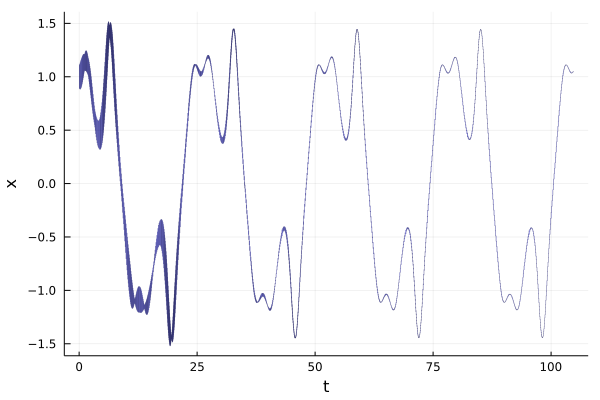

In [3]:
plot(sol, vars=(0, 1), xlab="t", ylab="x", lw=0.2, color=:blue)

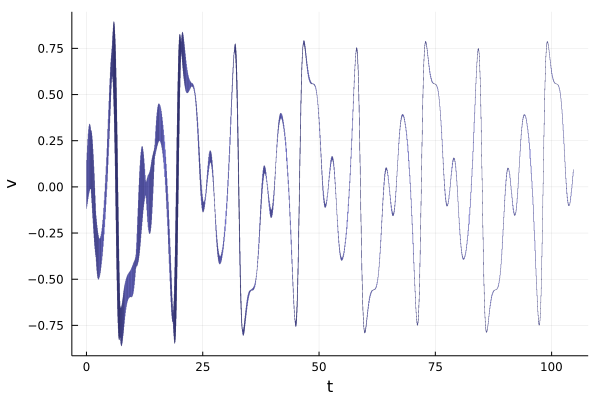

In [4]:
plot(sol, vars=(0, 2), xlab="t", ylab="v", lw=0.2, color=:blue)

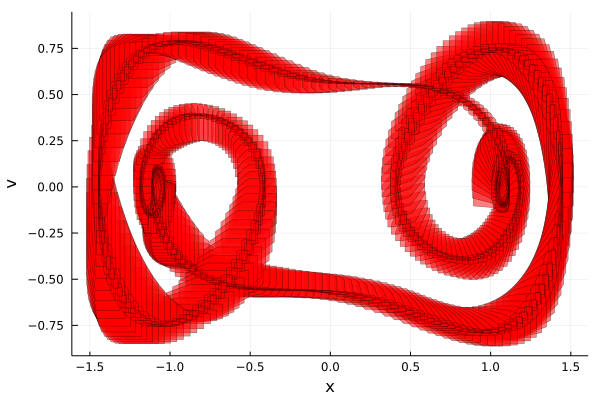

In [5]:
plot(sol, vars=(1, 2), xlab="x", ylab="v", lw=0.5, color=:red)